## Imports

In [153]:
import functions
import features
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Alex's Baseline Model Steps

In [2]:
# import raw data
raw_data = pd.read_csv('raw_data.tab', sep='\t')

In [3]:
raw_data

,MCSID,FCNUM00,FCCSEX00,FCCDBM00,FCCDBY00,FCCAGE00,FCVERSF0,FCINTROA,FCCHIC0A,FCCHIC0B,...,FCCARR02_TR3,FCCARR03_TR3,FCCARR04_TR3,FCCARR05_TR3,FCCARR06_TR3,FCCARR07_TR3,FCCARR08_TR3,FCCARR09_TR3,FCCARR10_TR3,FCCARR11_TR3
0,M10002P,1,1,3,2001,13,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,M10007U,1,1,10,2000,14,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,M10015U,1,2,5,2001,13,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,M10016V,1,1,11,2000,14,102,1,1,0,...,344,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,M10018X,1,2,7,2001,13,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,M35868P,1,1,11,2000,14,103,1,1,0,...,344,-1,-1,-1,-1,-1,-1,-1,-1,-1
11855,M35869Q,1,2,10,2001,14,103,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11856,M35872K,1,2,12,2000,14,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11857,M35873L,1,2,10,2000,14,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
# run smfq processing (engineers a y, and removes smfq features)
X, y = functions.add_smfq_label(raw_data)

In [5]:
X

,MCSID,FCNUM00,FCCSEX00,FCCDBM00,FCCDBY00,FCCAGE00,FCVERSF0,FCINTROA,FCCHIC0A,FCCHIC0B,...,FCCARR02_TR3,FCCARR03_TR3,FCCARR04_TR3,FCCARR05_TR3,FCCARR06_TR3,FCCARR07_TR3,FCCARR08_TR3,FCCARR09_TR3,FCCARR10_TR3,FCCARR11_TR3
0,M10002P,1,1,3,2001,13,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,M10007U,1,1,10,2000,14,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,M10015U,1,2,5,2001,13,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,M10016V,1,1,11,2000,14,102,1,1,0,...,344,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,M10018X,1,2,7,2001,13,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,M35868P,1,1,11,2000,14,103,1,1,0,...,344,-1,-1,-1,-1,-1,-1,-1,-1,-1
11855,M35869Q,1,2,10,2001,14,103,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11856,M35872K,1,2,12,2000,14,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11857,M35873L,1,2,10,2000,14,102,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [6]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11854    0
11855    0
11856    0
11857    1
11858    0
Name: smfq_label, Length: 11859, dtype: int64

In [7]:
# process features
X_processed = functions.feature_processor(X, features.features)

/Users/samandrews/code/mental_health_analysis/notebooks/pipeline/functions.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.  0.5 0.  ... 0.5 0.5 0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  output.loc[:, col] = scaler.transform(output[[col]])
/Users/samandrews/code/mental_health_analysis/notebooks/pipeline/functions.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.25 0.25 0.25 ... 0.5  1.   0.5 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  output.loc[:, col] = scaler.transform(output[[col]])
/Users/samandrews/code/mental_health_analysis/notebooks/pipeline/functions.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.57142857 0.71428571 0.14285714 ... 0.42857143

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
X_processed

In [8]:
# drop columns not found in the feature lists

# build list of all features in all categories
full_feature_list = []
for cat in features.features:
    full_feature_list.extend(features.features[cat])

# convert feature names to codes
full_code_list = [functions.get_variable_code(feature) for feature in full_feature_list]

# build list of features that appear in the dataset but not in the categories
features_to_drop = []
for feature in X_processed:
    if feature not in full_code_list:
        features_to_drop.append(feature)

# and remove them
X_processed_dropped = X_processed.drop(columns=features_to_drop)

NameError: name 'X_processed' is not defined

In [9]:
features

<module 'features' from '/Users/samandrews/code/mental_health_analysis/notebooks/pipeline/features.py'>

In [10]:
full_feature_list

['CM Age last birthday',
 'Height in centimeters',
 'Weight in kilos',
 'Body fat percentage',
 'Days last week spent doing moderate to vigorous physical activity',
 'Hours per WEEKDAY spent watching TV or videos on computer',
 'Hours per WEEKDAY spent playing electronic games',
 'Hours per week spent on social networking sites',
 'How likely is it CM will remain in education at the end of year 11?',
 'How likely is it CM will go to university? (Scale 0-100%)',
 'How willing is CM to take risks',
 'How patient is CM',
 'How much does CM trust others',
 'CM Sex',
 'Respondent s religion (A) [England]',
 'Left/Right handed?',
 'What type of bread does CM normally eat',
 'ActivGrid: Go to the cinema?',
 'ActivGrid: Go to watch live sport?',
 'ActivGrid: Sing in a choir or play in a band or orchestra?',
 'ActivGrid: Read for enjoyment (not for school)?',
 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?',
 'ActivGrid: Go to museums/galleries, visit historic plac

In [11]:
len(features_to_drop)

0

In [12]:
X_processed_dropped

NameError: name 'X_processed_dropped' is not defined

In [13]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_processed_dropped, y)

NameError: name 'X_processed_dropped' is not defined

In [14]:
X_train.describe

NameError: name 'X_train' is not defined

In [15]:
# define a baseline model
model_baseline = LogisticRegression()

In [16]:
# fit model to data
model_baseline.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [17]:
# score baseline model
model_baseline.score(X_test, y_test)

NameError: name 'X_test' is not defined

In [18]:
# save the model
datetime_string = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
file_name = f"models/model_{datetime_string}.pickle"

with open(file_name, 'wb') as file:
    pickle.dump(model_baseline, file)

## Preprocess Ordinal Category

In [19]:
X.shape, y.shape

((11859, 399), (11859,))

In [20]:
# import JSON dict of feature categories

import json

# Path to your JSON file
file_path = '/Users/samandrews/code/mental_health_analysis/notebooks/feature_lists_dict.json'

# Load JSON data into a Python object
with open(file_path, 'r') as f:
    feature_lists_dict = json.load(f)

# Now you can work with the loaded JSON data
# For example, you can print it
print(feature_lists_dict)


{'DS_numerical': ['CM Age last birthday', 'Height in centimeters', 'Weight in kilos', 'Body fat percentage', 'Days last week spent doing moderate to vigorous physical activity', 'Hours per WEEKDAY spent watching TV or videos on computer', 'Hours per WEEKDAY spent playing electronic games', 'Hours per week spent on social networking sites', 'How likely is it CM will remain in education at the end of year 11?', 'How likely is it CM will go to university? (Scale 0-100%)', 'How willing is CM to take risks', 'How patient is CM', 'How much does CM trust others'], 'DS_cat_nominal': ['CM Sex', 'Respondent s religion (A) [England]', 'Left/Right handed?', 'What type of bread does CM normally eat'], 'DS_cat_ordinal_lowest_num_is_highest_value': ['ActivGrid: Go to the cinema?', 'ActivGrid: Go to watch live sport?', 'ActivGrid: Sing in a choir or play in a band or orchestra?', 'ActivGrid: Read for enjoyment (not for school)?', 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activit

In [21]:
feature_lists_dict.keys()

dict_keys(['DS_numerical', 'DS_cat_nominal', 'DS_cat_ordinal_lowest_num_is_highest_value', 'DS_cat_ordinal_highest_num_is_highest_value', 'DS_cat_nominal_binary_Y1_N2', 'DS_cat_nominal_binary_Y1_N0'])

In [22]:
# import stat_df

# Replace 'file_path.csv' with the path to your CSV file
file_path = '/Users/samandrews/code/mental_health_analysis/notebooks/stat_df.csv'

# Read the CSV file into a DataFrame
stat_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
stat_df.head()


,CM Age last birthday,Height in centimeters,Weight in kilos,Body fat percentage,Days last week spent doing moderate to vigorous physical activity,Hours per WEEKDAY spent watching TV or videos on computer,Hours per WEEKDAY spent playing electronic games,Hours per week spent on social networking sites,How likely is it CM will remain in education at the end of year 11?,How likely is it CM will go to university? (Scale 0-100%),...,Languages used speaking with friends MC (A) [Arabic],Languages used speaking with friends MC (A) [Other],Languages used speaking with friends MC (A) [Other European language],Languages used speaking with friends MC (A) [Other African language],Languages used speaking with friends MC (A) [Other Asian language],What do you do if you are worried about smthng? (Tell a (boy/girl) friend),What do you do if you are worried about something? (Tell another relative),What do you do if you are worried about something? (Tell a teacher),What do you do if you are worried about something? (Tell another adult),What do you do if you are worried about something? (Keep it to myself)
0,13,163.2,52.3,16.5,2,5,2,3,90,77,...,0,0,0,0,0,0,0,0,0,1
1,14,173.6,57.1,14.4,2,6,8,7,100,80,...,0,0,0,0,0,0,0,1,0,0
2,13,163.9,56.2,26.7,2,2,2,2,100,94,...,0,0,0,0,0,1,0,0,1,0
3,14,167.0,51.5,18.8,1,5,4,2,80,85,...,0,0,0,0,0,0,0,0,0,1
4,13,163.8,56.9,26.7,4,6,1,4,100,100,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# extract the 'DS_cat_ordinal_lowest_num_is_highest_value' columns from my df

columns_to_select = feature_lists_dict['DS_cat_ordinal_lowest_num_is_highest_value']

# Filter df

selected_df = stat_df[columns_to_select]

selected_df.head()

,ActivGrid: Go to the cinema?,ActivGrid: Go to watch live sport?,ActivGrid: Sing in a choir or play in a band or orchestra?,ActivGrid: Read for enjoyment (not for school)?,ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?,"ActivGrid: Go to museums/galleries, visit historic place/stately home?",ActivGrid: Attend a religious service?,Do you allow unsupervised time outside home with frds (on weekends),Do you allow unsupervised time outside home with frds (afternoon after school),MoralAttGrid: How important is it to you to be well liked?,...,WellbeingGrid: How happy is CM with life as a whole,"RosenbergGrid: On the whole, I am satisfied with myself",RosenbergGrid: I feel I have a number of good qualities,RosenbergGrid: I am able to do things as well as most other people,RosenbergGrid: I am a person of value,RosenbergGrid: I feel good about myself,"SocSupGrid: I have family and friends who help me feel safe, secure and happy.",SocSupGrid: There is someone I trust whom I would turn to if I had problems,ConsumAttGrid: It bothers me if my friends have things I don't,Needs qualifications to get a job worth having
0,4,4,2,2,2,4,4,2,4,3,...,2,1,1,1,1,1,1,1,3,2
1,5,3,6,6,6,6,3,1,2,2,...,1,2,2,2,2,2,1,1,3,1
2,4,3,2,1,1,3,3,2,1,2,...,1,1,1,1,1,1,1,1,4,5
3,4,4,6,4,3,6,3,3,4,2,...,2,2,2,2,2,2,1,1,3,2
4,3,4,6,3,6,4,6,1,2,2,...,4,3,3,2,3,3,1,1,2,2


In [24]:
selected_df.value_counts().sum()

11859

In [25]:
# function for value count

def value_count(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Print column name
        print(f"Value counts for column '{column}':")
        # Print value counts for the column
        print(df[column].value_counts())
        print("\n")

In [26]:
value_count(selected_df)

Value counts for column 'ActivGrid: Go to the cinema?':
ActivGrid: Go to the cinema?
 4    5604
 3    3518
 5    1391
 6     641
-1     349
 2     265
 1      71
-8      15
-9       5
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to watch live sport?':
ActivGrid: Go to watch live sport?
 6    5194
 5    2353
 4    1782
 3     971
 2     762
 1     400
-1     349
-8      34
-9      14
Name: count, dtype: int64


Value counts for column 'ActivGrid: Sing in a choir or play in a band or orchestra?':
ActivGrid: Sing in a choir or play in a band or orchestra?
 6    8815
 2     913
 5     752
 1     373
 4     363
-1     349
 3     245
-8      34
-9      15
Name: count, dtype: int64


Value counts for column 'ActivGrid: Read for enjoyment (not for school)?':
ActivGrid: Read for enjoyment (not for school)?
 1    2429
 6    2319
 2    1984
 3    1933
 4    1526
 5    1269
-1     349
-8      33
-9      17
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to 

In [27]:
selected_df['ActivGrid: Go to the cinema?'].value_counts().sum()

11859

In [28]:
# create a funtion to replace all negative values with nan

def replace_negatives_with_nan(df):
    df = df.where(df >= 0, np.nan)
    # Assuming df is your DataFrame
    for column in df.columns:
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print("\n")

    return df


In [29]:
modified_df = replace_negatives_with_nan(selected_df)

Value counts for column 'ActivGrid: Go to the cinema?':
ActivGrid: Go to the cinema?
4.0    5604
3.0    3518
5.0    1391
6.0     641
2.0     265
1.0      71
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to watch live sport?':
ActivGrid: Go to watch live sport?
6.0    5194
5.0    2353
4.0    1782
3.0     971
2.0     762
1.0     400
Name: count, dtype: int64


Value counts for column 'ActivGrid: Sing in a choir or play in a band or orchestra?':
ActivGrid: Sing in a choir or play in a band or orchestra?
6.0    8815
2.0     913
5.0     752
1.0     373
4.0     363
3.0     245
Name: count, dtype: int64


Value counts for column 'ActivGrid: Read for enjoyment (not for school)?':
ActivGrid: Read for enjoyment (not for school)?
1.0    2429
6.0    2319
2.0    1984
3.0    1933
4.0    1526
5.0    1269
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?':
ActivGrid: Go to youth clubs/scouts/girlguides 

In [30]:
modified_df['ActivGrid: Go to the cinema?'].value_counts().sum()

11490

In [31]:
nan_count = modified_df.isna().sum()

print("Number of NaN values in each column:")
print(nan_count)

Number of NaN values in each column:
ActivGrid: Go to the cinema?                                                       369
ActivGrid: Go to watch live sport?                                                 397
ActivGrid: Sing in a choir or play in a band or orchestra?                         398
ActivGrid: Read for enjoyment (not for school)?                                    399
ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?        362
ActivGrid: Go to museums/galleries, visit historic place/stately home?             371
ActivGrid: Attend a religious service?                                             380
Do you allow unsupervised time outside home with frds (on weekends)                358
Do you allow unsupervised time outside home with frds (afternoon after school)     361
MoralAttGrid: How important is it to you to be well liked?                         379
MoralAttGrid: How important is it to you to work hard?                             378
Wrong 

In [32]:
filtered_filled_df = modified_df.fillna(modified_df.mode().iloc[0])

In [33]:
value_count(filtered_filled_df)

Value counts for column 'ActivGrid: Go to the cinema?':
ActivGrid: Go to the cinema?
4.0    5973
3.0    3518
5.0    1391
6.0     641
2.0     265
1.0      71
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to watch live sport?':
ActivGrid: Go to watch live sport?
6.0    5591
5.0    2353
4.0    1782
3.0     971
2.0     762
1.0     400
Name: count, dtype: int64


Value counts for column 'ActivGrid: Sing in a choir or play in a band or orchestra?':
ActivGrid: Sing in a choir or play in a band or orchestra?
6.0    9213
2.0     913
5.0     752
1.0     373
4.0     363
3.0     245
Name: count, dtype: int64


Value counts for column 'ActivGrid: Read for enjoyment (not for school)?':
ActivGrid: Read for enjoyment (not for school)?
1.0    2828
6.0    2319
2.0    1984
3.0    1933
4.0    1526
5.0    1269
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?':
ActivGrid: Go to youth clubs/scouts/girlguides 

In [34]:
filtered_filled_df['ActivGrid: Go to the cinema?'].value_counts().sum()

11859

## Reverse the lowest/highest inverse ordinal category

In [35]:
filtered_filled_df.head()

,ActivGrid: Go to the cinema?,ActivGrid: Go to watch live sport?,ActivGrid: Sing in a choir or play in a band or orchestra?,ActivGrid: Read for enjoyment (not for school)?,ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?,"ActivGrid: Go to museums/galleries, visit historic place/stately home?",ActivGrid: Attend a religious service?,Do you allow unsupervised time outside home with frds (on weekends),Do you allow unsupervised time outside home with frds (afternoon after school),MoralAttGrid: How important is it to you to be well liked?,...,WellbeingGrid: How happy is CM with life as a whole,"RosenbergGrid: On the whole, I am satisfied with myself",RosenbergGrid: I feel I have a number of good qualities,RosenbergGrid: I am able to do things as well as most other people,RosenbergGrid: I am a person of value,RosenbergGrid: I feel good about myself,"SocSupGrid: I have family and friends who help me feel safe, secure and happy.",SocSupGrid: There is someone I trust whom I would turn to if I had problems,ConsumAttGrid: It bothers me if my friends have things I don't,Needs qualifications to get a job worth having
0,4.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,4.0,3.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0
1,5.0,3.0,6.0,6.0,6.0,6.0,3.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0
2,4.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,5.0
3,4.0,4.0,6.0,4.0,3.0,6.0,3.0,3.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0
4,3.0,4.0,6.0,3.0,6.0,4.0,6.0,1.0,2.0,2.0,...,4.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,2.0


In [36]:
# Reverse the ordinal values
max_value = filtered_filled_df.max().max()  # Find the maximum value in the entire DataFrame
df_reverse = max_value + 1 - filtered_filled_df

# Now df_reverse contains the reversed ordinal values
df_reverse.head()

,ActivGrid: Go to the cinema?,ActivGrid: Go to watch live sport?,ActivGrid: Sing in a choir or play in a band or orchestra?,ActivGrid: Read for enjoyment (not for school)?,ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?,"ActivGrid: Go to museums/galleries, visit historic place/stately home?",ActivGrid: Attend a religious service?,Do you allow unsupervised time outside home with frds (on weekends),Do you allow unsupervised time outside home with frds (afternoon after school),MoralAttGrid: How important is it to you to be well liked?,...,WellbeingGrid: How happy is CM with life as a whole,"RosenbergGrid: On the whole, I am satisfied with myself",RosenbergGrid: I feel I have a number of good qualities,RosenbergGrid: I am able to do things as well as most other people,RosenbergGrid: I am a person of value,RosenbergGrid: I feel good about myself,"SocSupGrid: I have family and friends who help me feel safe, secure and happy.",SocSupGrid: There is someone I trust whom I would turn to if I had problems,ConsumAttGrid: It bothers me if my friends have things I don't,Needs qualifications to get a job worth having
0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,6.0,4.0,5.0,...,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,6.0
1,3.0,5.0,2.0,2.0,2.0,2.0,5.0,7.0,6.0,6.0,...,7.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,5.0,7.0
2,4.0,5.0,6.0,7.0,7.0,5.0,5.0,6.0,7.0,6.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,4.0,3.0
3,4.0,4.0,2.0,4.0,5.0,2.0,5.0,5.0,4.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,5.0,6.0
4,5.0,4.0,2.0,5.0,2.0,4.0,2.0,7.0,6.0,6.0,...,4.0,5.0,5.0,6.0,5.0,5.0,7.0,7.0,6.0,6.0


In [37]:
value_count(filtered_filled_df)

Value counts for column 'ActivGrid: Go to the cinema?':
ActivGrid: Go to the cinema?
4.0    5973
3.0    3518
5.0    1391
6.0     641
2.0     265
1.0      71
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to watch live sport?':
ActivGrid: Go to watch live sport?
6.0    5591
5.0    2353
4.0    1782
3.0     971
2.0     762
1.0     400
Name: count, dtype: int64


Value counts for column 'ActivGrid: Sing in a choir or play in a band or orchestra?':
ActivGrid: Sing in a choir or play in a band or orchestra?
6.0    9213
2.0     913
5.0     752
1.0     373
4.0     363
3.0     245
Name: count, dtype: int64


Value counts for column 'ActivGrid: Read for enjoyment (not for school)?':
ActivGrid: Read for enjoyment (not for school)?
1.0    2828
6.0    2319
2.0    1984
3.0    1933
4.0    1526
5.0    1269
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?':
ActivGrid: Go to youth clubs/scouts/girlguides 

In [38]:
value_count(df_reverse)

Value counts for column 'ActivGrid: Go to the cinema?':
ActivGrid: Go to the cinema?
4.0    5973
5.0    3518
3.0    1391
2.0     641
6.0     265
7.0      71
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to watch live sport?':
ActivGrid: Go to watch live sport?
2.0    5591
3.0    2353
4.0    1782
5.0     971
6.0     762
7.0     400
Name: count, dtype: int64


Value counts for column 'ActivGrid: Sing in a choir or play in a band or orchestra?':
ActivGrid: Sing in a choir or play in a band or orchestra?
2.0    9213
6.0     913
3.0     752
7.0     373
4.0     363
5.0     245
Name: count, dtype: int64


Value counts for column 'ActivGrid: Read for enjoyment (not for school)?':
ActivGrid: Read for enjoyment (not for school)?
7.0    2828
2.0    2319
6.0    1984
5.0    1933
4.0    1526
3.0    1269
Name: count, dtype: int64


Value counts for column 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?':
ActivGrid: Go to youth clubs/scouts/girlguides 

In [39]:
df_reverse.shape

(11859, 59)

In [40]:
display(stat_df['ActivGrid: Go to the cinema?'].value_counts())
display(stat_df['ActivGrid: Go to the cinema?'].value_counts().sum())

ActivGrid: Go to the cinema?
 4    5604
 3    3518
 5    1391
 6     641
-1     349
 2     265
 1      71
-8      15
-9       5
Name: count, dtype: int64

11859

In [41]:
# insert reverse_df into stat_df

for column in df_reverse.columns:
    if column in stat_df.columns:
        stat_df[column] = df_reverse[column].values


In [42]:
display(stat_df['ActivGrid: Go to the cinema?'].value_counts())
display(stat_df['ActivGrid: Go to the cinema?'].value_counts().sum())

ActivGrid: Go to the cinema?
4.0    5973
5.0    3518
3.0    1391
2.0     641
6.0     265
7.0      71
Name: count, dtype: int64

11859

## Preprocess stat_df

In [43]:
feature_lists_dict.keys()

dict_keys(['DS_numerical', 'DS_cat_nominal', 'DS_cat_ordinal_lowest_num_is_highest_value', 'DS_cat_ordinal_highest_num_is_highest_value', 'DS_cat_nominal_binary_Y1_N2', 'DS_cat_nominal_binary_Y1_N0'])

In [44]:
# extract the 'DS_cat_ordinal_lowest_num_is_highest_value' columns from my df

columns_to_select = feature_lists_dict['DS_cat_ordinal_lowest_num_is_highest_value'] + \
feature_lists_dict['DS_cat_ordinal_highest_num_is_highest_value']

# Filter df

selected_df = stat_df[columns_to_select]

selected_df.head()

,ActivGrid: Go to the cinema?,ActivGrid: Go to watch live sport?,ActivGrid: Sing in a choir or play in a band or orchestra?,ActivGrid: Read for enjoyment (not for school)?,ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?,"ActivGrid: Go to museums/galleries, visit historic place/stately home?",ActivGrid: Attend a religious service?,Do you allow unsupervised time outside home with frds (on weekends),Do you allow unsupervised time outside home with frds (afternoon after school),MoralAttGrid: How important is it to you to be well liked?,...,FeelingsGrid: I was a bad person,FeelingsGrid: I felt lonely,FeelingsGrid: I thought nobody really loved me,FeelingsGrid: I thought I could never be as good as other kids,FeelingsGrid: I did everything wrong,How often CM's friends smoke cigarettes,AcademicSelfConceptGrid: I am good at English,AcademicSelfConceptGrid: I am good at Maths,AcademicSelfConceptGrid: I am good at Science,AcademicSelfConceptGrid: I am good at PE
0,4.0,4.0,6.0,6.0,6.0,4.0,4.0,6.0,4.0,5.0,...,1,1,1,1,1,1,3,4,4,4
1,3.0,5.0,2.0,2.0,2.0,2.0,5.0,7.0,6.0,6.0,...,1,1,1,1,1,1,4,2,3,4
2,4.0,5.0,6.0,7.0,7.0,5.0,5.0,6.0,7.0,6.0,...,1,1,1,1,1,1,3,2,4,4
3,4.0,4.0,2.0,4.0,5.0,2.0,5.0,5.0,4.0,6.0,...,1,1,1,1,1,1,3,3,3,4
4,5.0,4.0,2.0,5.0,2.0,4.0,2.0,7.0,6.0,6.0,...,2,1,1,2,1,2,3,3,1,2


In [45]:
# process by converting the negatives in ordinal categories into mode

def replace_negatives_with_mode(df):
    # Replace negative values with NaN
    df = df.where(df >= 0, np.nan)
    
    # Replace NaNs with mode of each column
    mode_values = df.mode().iloc[0]
    df = df.fillna(mode_values)
    
    return df

In [46]:
selected_df = replace_negatives_with_mode(selected_df)

In [47]:
# insert selected_df into stat_df

for column in selected_df.columns:
    if column in stat_df.columns:
        stat_df[column] = selected_df[column].values

In [48]:
stat_df['Body fat percentage'].value_counts()

Body fat percentage
-1.0     824
-5.0      90
 24.1     60
 25.1     57
 16.5     53
        ... 
 46.3      1
 2.7       1
 3.3       1
 5.5       1
 48.6      1
Name: count, Length: 473, dtype: int64

In [49]:
def replace_negatives_with_mean(df):
    # Replace negative values with NaN
    df = df.where(df >= 0, np.nan)
    
    # Replace NaNs with mean of each column
    mean_values = df.mean()
    df = df.fillna(mean_values)
    
    return df

In [50]:
# extract the 'DS_cat_ordinal_lowest_num_is_highest_value' columns from my df

columns_to_select = feature_lists_dict['DS_numerical']

# Filter df

selected_df = stat_df[columns_to_select]

selected_df.head()

,CM Age last birthday,Height in centimeters,Weight in kilos,Body fat percentage,Days last week spent doing moderate to vigorous physical activity,Hours per WEEKDAY spent watching TV or videos on computer,Hours per WEEKDAY spent playing electronic games,Hours per week spent on social networking sites,How likely is it CM will remain in education at the end of year 11?,How likely is it CM will go to university? (Scale 0-100%),How willing is CM to take risks,How patient is CM,How much does CM trust others
0,13,163.2,52.3,16.5,2,5,2,3,90,77,9,8,8
1,14,173.6,57.1,14.4,2,6,8,7,100,80,7,5,7
2,13,163.9,56.2,26.7,2,2,2,2,100,94,6,9,8
3,14,167.0,51.5,18.8,1,5,4,2,80,85,6,4,7
4,13,163.8,56.9,26.7,4,6,1,4,100,100,8,8,7


In [51]:
selected_df = replace_negatives_with_mean(selected_df)

# insert selected_df into stat_df

for column in selected_df.columns:
    if column in updated_stat_df.columns:
        updated_stat_df[column] = selected_df[column].values

NameError: name 'updated_stat_df' is not defined

In [52]:
stat_df['Body fat percentage'].value_counts()

Body fat percentage
-1.0     824
-5.0      90
 24.1     60
 25.1     57
 16.5     53
        ... 
 46.3      1
 2.7       1
 3.3       1
 5.5       1
 48.6      1
Name: count, Length: 473, dtype: int64

In [53]:
def count_negative_values(df):
    """
    Count the number of negative values in each column of a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    neg_counts (dict): A dictionary where keys are column names and values are the count of negative values in each column.
    """
    neg_counts = {}  # Dictionary to store counts of negative values in each column
    
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Count the number of negative values in the column
        neg_count = df[column].lt(0).sum()  # lt(0) checks if value is less than 0, sum() counts True values
        neg_counts[column] = neg_count  # Store the count in the dictionary
    
    return neg_counts


In [54]:
count_negative_values(stat_df)

{'CM Age last birthday': 0,
 'Height in centimeters': 476,
 'Weight in kilos': 774,
 'Body fat percentage': 914,
 'Days last week spent doing moderate to vigorous physical activity': 368,
 'Hours per WEEKDAY spent watching TV or videos on computer': 359,
 'Hours per WEEKDAY spent playing electronic games': 361,
 'Hours per week spent on social networking sites': 361,
 'How likely is it CM will remain in education at the end of year 11?': 490,
 'How likely is it CM will go to university? (Scale 0-100%)': 892,
 'How willing is CM to take risks': 504,
 'How patient is CM': 457,
 'How much does CM trust others': 440,
 'CM Sex': 0,
 'Respondent s religion (A) [England]': 4285,
 'Left/Right handed?': 363,
 'What type of bread does CM normally eat': 416,
 'ActivGrid: Go to the cinema?': 0,
 'ActivGrid: Go to watch live sport?': 0,
 'ActivGrid: Sing in a choir or play in a band or orchestra?': 0,
 'ActivGrid: Read for enjoyment (not for school)?': 0,
 'ActivGrid: Go to youth clubs/scouts/girlg

In [55]:
def replace_negatives_with_nan(df):
    updated_df = df.where(df >= 0, np.nan)
    # Print value counts for each column in the updated DataFrame
    for column in updated_df.columns:
        print(f"Value counts for column '{column}':")
        print(updated_df[column].value_counts())
        print("\n")
    
    # Return the updated DataFrame
    return updated_df

In [56]:
updated_stat_df = replace_negatives_with_nan(stat_df)

Value counts for column 'CM Age last birthday':
CM Age last birthday
14    8841
13    2858
15     160
Name: count, dtype: int64


Value counts for column 'Height in centimeters':
Height in centimeters
165.0    89
162.0    85
160.5    82
159.0    79
163.5    78
         ..
144.7     1
183.3     1
134.2     1
143.5     1
182.3     1
Name: count, Length: 492, dtype: int64


Value counts for column 'Weight in kilos':
Weight in kilos
56.6     60
54.2     56
54.3     54
51.7     53
52.0     53
         ..
109.9     1
93.1      1
102.2     1
101.0     1
25.5      1
Name: count, Length: 741, dtype: int64


Value counts for column 'Body fat percentage':
Body fat percentage
24.1    60
25.1    57
16.5    53
24.8    53
13.8    52
        ..
2.7      1
3.3      1
5.5      1
56.0     1
48.6     1
Name: count, Length: 471, dtype: int64


Value counts for column 'Days last week spent doing moderate to vigorous physical activity':
Days last week spent doing moderate to vigorous physical activity
3.0   

In [57]:
nan_counts = updated_stat_df.isna().sum()
print(nan_counts)

CM Age last birthday                                                            0
Height in centimeters                                                         476
Weight in kilos                                                               774
Body fat percentage                                                           914
Days last week spent doing moderate to vigorous physical activity             368
                                                                             ... 
What do you do if you are worried about smthng? (Tell a (boy/girl) friend)    586
What do you do if you are worried about something? (Tell another relative)    586
What do you do if you are worried about something? (Tell a teacher)           586
What do you do if you are worried about something? (Tell another adult)       586
What do you do if you are worried about something? (Keep it to myself)        586
Length: 183, dtype: int64


In [58]:
# Calculate the median for each column
median_values = updated_stat_df.median()

# Replace NaN values with the median for each column
stat_df_filled = updated_stat_df.fillna(median_values)

stat_df_filled.shape

(11859, 183)

In [59]:
nan_counts = stat_df_filled.isna().sum()
print(nan_counts)

CM Age last birthday                                                          0
Height in centimeters                                                         0
Weight in kilos                                                               0
Body fat percentage                                                           0
Days last week spent doing moderate to vigorous physical activity             0
                                                                             ..
What do you do if you are worried about smthng? (Tell a (boy/girl) friend)    0
What do you do if you are worried about something? (Tell another relative)    0
What do you do if you are worried about something? (Tell a teacher)           0
What do you do if you are worried about something? (Tell another adult)       0
What do you do if you are worried about something? (Keep it to myself)        0
Length: 183, dtype: int64


In [60]:
updated_stat_df = stat_df_filled

In [61]:
updated_stat_df.head()

,CM Age last birthday,Height in centimeters,Weight in kilos,Body fat percentage,Days last week spent doing moderate to vigorous physical activity,Hours per WEEKDAY spent watching TV or videos on computer,Hours per WEEKDAY spent playing electronic games,Hours per week spent on social networking sites,How likely is it CM will remain in education at the end of year 11?,How likely is it CM will go to university? (Scale 0-100%),...,Languages used speaking with friends MC (A) [Arabic],Languages used speaking with friends MC (A) [Other],Languages used speaking with friends MC (A) [Other European language],Languages used speaking with friends MC (A) [Other African language],Languages used speaking with friends MC (A) [Other Asian language],What do you do if you are worried about smthng? (Tell a (boy/girl) friend),What do you do if you are worried about something? (Tell another relative),What do you do if you are worried about something? (Tell a teacher),What do you do if you are worried about something? (Tell another adult),What do you do if you are worried about something? (Keep it to myself)
0,13,163.2,52.3,16.5,2.0,5.0,2.0,3.0,90.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14,173.6,57.1,14.4,2.0,6.0,8.0,7.0,100.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13,163.9,56.2,26.7,2.0,2.0,2.0,2.0,100.0,94.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,14,167.0,51.5,18.8,1.0,5.0,4.0,2.0,80.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13,163.8,56.9,26.7,4.0,6.0,1.0,4.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Specify the file path where you want to save the CSV file
file_path = "updated_stat_df.csv"

# Export the DataFrame to a CSV file
updated_stat_df.to_csv(file_path, index=False)

print(f"DataFrame has been exported to {file_path}")

DataFrame has been exported to updated_stat_df.csv


In [63]:
feature_lists_dict.keys()

dict_keys(['DS_numerical', 'DS_cat_nominal', 'DS_cat_ordinal_lowest_num_is_highest_value', 'DS_cat_ordinal_highest_num_is_highest_value', 'DS_cat_nominal_binary_Y1_N2', 'DS_cat_nominal_binary_Y1_N0'])

## Convert all binary columns to same format

In [64]:
# extract the 'DS_cat_ordinal_lowest_num_is_highest_value' columns from my df

columns_to_select = feature_lists_dict['DS_cat_nominal_binary_Y1_N2']

# Filter df

selected_df = updated_stat_df[columns_to_select]

selected_df.head()

,Does CM have computer of their own,Has CM has any formal cycle training,Quiet area where CM is able to do homework,Has CM missed school without parents' permission,DisciplineGrid: Tell you off or shout at you?,"DisciplineGrid: Ground you, stop you going out or from seeing your friends?",DisciplineGrid: Punish you in some other way?,Does your natural father live with you?,Do you have any close friends? (friends = other young people),(last 12 months) has CM held hands with another young person?,...,Has CM ever been given a formal warning or caution from police,Has CM ever been arrested,Past 12 months: has CM sent viruses to damage/infect other computers,Does CM wear glasses or contact lenses,Does CM have difficulty seeing,Does CM have difficulty hearing,Has CM been to a dentist in last 12 months,Has CM ever exercised to lose weight,Has CM ever eaten less to lose weight,In the past year has CM self-harmed
0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
1,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
2,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
3,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0
4,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0


In [65]:
selected_df = selected_df.replace(2,0)
selected_df.head()

,Does CM have computer of their own,Has CM has any formal cycle training,Quiet area where CM is able to do homework,Has CM missed school without parents' permission,DisciplineGrid: Tell you off or shout at you?,"DisciplineGrid: Ground you, stop you going out or from seeing your friends?",DisciplineGrid: Punish you in some other way?,Does your natural father live with you?,Do you have any close friends? (friends = other young people),(last 12 months) has CM held hands with another young person?,...,Has CM ever been given a formal warning or caution from police,Has CM ever been arrested,Past 12 months: has CM sent viruses to damage/infect other computers,Does CM wear glasses or contact lenses,Does CM have difficulty seeing,Does CM have difficulty hearing,Has CM been to a dentist in last 12 months,Has CM ever exercised to lose weight,Has CM ever eaten less to lose weight,In the past year has CM self-harmed
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [66]:
# insert selected_df into stat_df

for column in selected_df.columns:
    if column in updated_stat_df.columns:
        updated_stat_df[column] = selected_df[column].values

In [67]:
updated_stat_df["Has CM missed school without parents' permission"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11854    1.0
11855    0.0
11856    0.0
11857    0.0
11858    0.0
Name: Has CM missed school without parents' permission, Length: 11859, dtype: float64

## Preprocessor Pipeline

In [68]:
feature_lists_dict.keys()

dict_keys(['DS_numerical', 'DS_cat_nominal', 'DS_cat_ordinal_lowest_num_is_highest_value', 'DS_cat_ordinal_highest_num_is_highest_value', 'DS_cat_nominal_binary_Y1_N2', 'DS_cat_nominal_binary_Y1_N0'])

In [69]:
numerical_features = feature_lists_dict['DS_numerical']
categorical_nominal_binary_features = feature_lists_dict['DS_cat_nominal_binary_Y1_N2'] + \
                                        feature_lists_dict['DS_cat_nominal_binary_Y1_N0']

categorical_ordinal_features = feature_lists_dict['DS_cat_ordinal_lowest_num_is_highest_value'] + \
                                feature_lists_dict['DS_cat_ordinal_highest_num_is_highest_value']
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())
])

categorical_nominal_features = feature_lists_dict['DS_cat_nominal']
categorical_nominal_transformer = Pipeline(steps=[
    ('OHE_encoder', OneHotEncoder(handle_unknown='ignore', categories='auto'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        #('num', numerical_transformer, numerical_features),
        ('cat_ordinal', categorical_ordinal_transformer, categorical_ordinal_features),
        ('cat_nominal', categorical_nominal_transformer, categorical_nominal_features)
    ])

# Create a pipeline with the preprocessor and any additional steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor)
                          ])

# Apply the pipeline to your DataFrame
transformed_data = pipeline.fit_transform(updated_stat_df)

In [70]:


# Now that the pipeline is fitted, you can retrieve column names after transformation
transformed_column_names = []

# Numerical columns
numerical_column_names = numerical_features
transformed_column_names.extend(numerical_column_names)

# Categorical ordinal columns
categorical_ordinal_encoded_features = categorical_ordinal_transformer.named_steps['ordinal_encoder'].categories
for i, categories in enumerate(categorical_ordinal_encoded_features):
    feature = categorical_ordinal_features[i]
    transformed_column_names.extend([f"{feature}_encoded_{cat}" for cat in categories])

# Categorical nominal columns
categorical_nominal_encoded_features = categorical_nominal_transformer.named_steps['OHE_encoder'].get_feature_names_out(categorical_nominal_features)
transformed_column_names.extend(categorical_nominal_encoded_features)

# Now transformed_column_names contains the column names after transformation


NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [71]:
transformed_df = pd.DataFrame(transformed_data)

In [72]:
transformed_df

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,2.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,3.0,4.0,5.0,5.0,3.0,3.0,2.0,4.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,2.0,3.0,0.0,3.0,1.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,2.0,0.0,3.0,0.0,2.0,0.0,3.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,1.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11855,1.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11856,2.0,2.0,0.0,3.0,0.0,1.0,0.0,3.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11857,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Deep Learning Model

In [73]:
X, y = functions.add_smfq_label(raw_data)

In [74]:
y_df = pd.DataFrame(y)
y_df

,smfq_label
0,0
1,0
2,0
3,0
4,0
...,...
11854,0
11855,0
11856,0
11857,1


In [75]:
X = transformed_df

In [76]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
y_train

10830    0
4560     0
3637     0
9811     0
7060     0
        ..
7633     1
8711     0
3417     0
7294     0
9252     0
Name: smfq_label, Length: 8894, dtype: int64

In [78]:
input_shape = X_train.shape[1]
num_classes=2
num_epochs=1000
batch_size = 16

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define your model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))

# Add more hidden layers if needed
model.add(Dense(64, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/1000


/Users/samandrews/.pyenv/versions/3.10.6/envs/mental_health_analysis/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9253 - loss: 0.1826 - val_accuracy: 0.9798 - val_loss: 0.0503
Epoch 2/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.9751 - loss: 0.0619 - val_accuracy: 0.9843 - val_loss: 0.0419
Epoch 3/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9801 - loss: 0.0484 - val_accuracy: 0.9876 - val_loss: 0.0307
Epoch 4/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9769 - loss: 0.0519 - val_accuracy: 0.9893 - val_loss: 0.0280
Epoch 5/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9832 - loss: 0.0392 - val_accuracy: 0.9859 - val_loss: 0.0325
Epoch 6/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9856 - loss: 0.0328 - val_accuracy: 0.9831 - val_loss: 0.0398
Epoch 7/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.9861 - loss: 0.0340 - val_accuracy: 0.9848 - val_loss: 0.0302
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9877 - loss: 0.0392
Test accuracy:

## Deep Learning Model Nr 2

In [116]:
import pickle

# Assuming your pickle file is named 'example.pkl' and is in the same directory as your notebook
file_path = '/Users/samandrews/code/mental_health_analysis/notebooks/pipeline/datasets/X_processed_names'

# Open the pickle file for reading in binary mode
with open(file_path, 'rb') as file:
    # Load the pickled data
    data = pickle.load(file)

# Now 'data' contains the Python object stored in the pickle file
# You can use or inspect 'data' as needed
data


,CM Age last birthday,Height in centimeters,Weight in kilos,Body fat percentage,ActivGrid: Go to the cinema?,ActivGrid: Go to watch live sport?,ActivGrid: Sing in a choir or play in a band or orchestra?,ActivGrid: Read for enjoyment (not for school)?,ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?,"ActivGrid: Go to museums/galleries, visit historic place/stately home?",...,Respondent s religion (A) [England]_9,Respondent s religion (A) [England]_10,Respondent s religion (A) [England]_11,Left/Right handed?_2,Left/Right handed?_3,What type of bread does CM normally eat_2,What type of bread does CM normally eat_3,What type of bread does CM normally eat_4,What type of bread does CM normally eat_5,What type of bread does CM normally eat_6
0,0.0,0.844650,0.440496,0.237772,0.4,0.4,0.8,0.8,0.8,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.5,0.898148,0.480165,0.209239,0.2,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.848251,0.472727,0.376359,0.4,0.6,0.8,1.0,1.0,0.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.5,0.864198,0.433884,0.269022,0.4,0.4,0.0,0.4,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.847737,0.478512,0.376359,0.6,0.4,0.0,0.6,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,0.5,0.942901,0.597521,0.194293,0.2,0.4,0.0,0.4,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11855,0.5,0.815844,0.448760,0.380435,0.2,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11856,0.5,0.842078,0.409091,0.278533,0.4,0.4,0.0,0.6,0.0,0.2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11857,0.5,0.881687,0.514050,0.422554,0.2,0.0,0.0,1.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X = data
X

,CM Age last birthday,Height in centimeters,Weight in kilos,Body fat percentage,ActivGrid: Go to the cinema?,ActivGrid: Go to watch live sport?,ActivGrid: Sing in a choir or play in a band or orchestra?,ActivGrid: Read for enjoyment (not for school)?,ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?,"ActivGrid: Go to museums/galleries, visit historic place/stately home?",...,Respondent s religion (A) [England]_9,Respondent s religion (A) [England]_10,Respondent s religion (A) [England]_11,Left/Right handed?_2,Left/Right handed?_3,What type of bread does CM normally eat_2,What type of bread does CM normally eat_3,What type of bread does CM normally eat_4,What type of bread does CM normally eat_5,What type of bread does CM normally eat_6
0,0.0,0.844650,0.440496,0.237772,0.4,0.4,0.8,0.8,0.8,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.5,0.898148,0.480165,0.209239,0.2,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.848251,0.472727,0.376359,0.4,0.6,0.8,1.0,1.0,0.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.5,0.864198,0.433884,0.269022,0.4,0.4,0.0,0.4,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.847737,0.478512,0.376359,0.6,0.4,0.0,0.6,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,0.5,0.942901,0.597521,0.194293,0.2,0.4,0.0,0.4,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11855,0.5,0.815844,0.448760,0.380435,0.2,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11856,0.5,0.842078,0.409091,0.278533,0.4,0.4,0.0,0.6,0.0,0.2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11857,0.5,0.881687,0.514050,0.422554,0.2,0.0,0.0,1.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
# Assuming your pickle file is named 'example.pkl' and is in the same directory as your notebook
file_path = '/Users/samandrews/code/mental_health_analysis/notebooks/pipeline/datasets/y'

# Open the pickle file for reading in binary mode
with open(file_path, 'rb') as file:
    # Load the pickled data
    y = pickle.load(file)

# Now 'data' contains the Python object stored in the pickle file
# You can use or inspect 'data' as needed
y


array([0, 0, 0, ..., 0, 1, 0])

In [134]:
np.unique(y, return_counts=True)

(array([0, 1]), array([10118,  1741]))

In [119]:
feature_lists_dict

{'DS_numerical': ['CM Age last birthday',
  'Height in centimeters',
  'Weight in kilos',
  'Body fat percentage',
  'Days last week spent doing moderate to vigorous physical activity',
  'Hours per WEEKDAY spent watching TV or videos on computer',
  'Hours per WEEKDAY spent playing electronic games',
  'Hours per week spent on social networking sites',
  'How likely is it CM will remain in education at the end of year 11?',
  'How likely is it CM will go to university? (Scale 0-100%)',
  'How willing is CM to take risks',
  'How patient is CM',
  'How much does CM trust others'],
 'DS_cat_nominal': ['CM Sex',
  'Respondent s religion (A) [England]',
  'Left/Right handed?',
  'What type of bread does CM normally eat'],
 'DS_cat_ordinal_lowest_num_is_highest_value': ['ActivGrid: Go to the cinema?',
  'ActivGrid: Go to watch live sport?',
  'ActivGrid: Sing in a choir or play in a band or orchestra?',
  'ActivGrid: Read for enjoyment (not for school)?',
  'ActivGrid: Go to youth clubs/sc

In [126]:
# Selecting only the columns present in the dictionary
selected_columns = []
for key, value in feature_lists_dict.items():
    for col in value:
        if col in X.columns:
            selected_columns.append(col)

selected_df = X[selected_columns]

selected_df

,CM Age last birthday,Height in centimeters,Weight in kilos,Body fat percentage,Days last week spent doing moderate to vigorous physical activity,Hours per WEEKDAY spent watching TV or videos on computer,Hours per WEEKDAY spent playing electronic games,Hours per week spent on social networking sites,How likely is it CM will remain in education at the end of year 11?,How likely is it CM will go to university? (Scale 0-100%),...,Languages used speaking with friends MC (A) [Arabic],Languages used speaking with friends MC (A) [Other],Languages used speaking with friends MC (A) [Other European language],Languages used speaking with friends MC (A) [Other African language],Languages used speaking with friends MC (A) [Other Asian language],What do you do if you are worried about smthng? (Tell a (boy/girl) friend),What do you do if you are worried about something? (Tell another relative),What do you do if you are worried about something? (Tell a teacher),What do you do if you are worried about something? (Tell another adult),What do you do if you are worried about something? (Keep it to myself)
0,0.0,0.844650,0.440496,0.237772,0.25,0.571429,0.142857,0.285714,0.9,0.77,...,0,0,0,0,0,0,0,0,0,1
1,0.5,0.898148,0.480165,0.209239,0.25,0.714286,1.000000,0.857143,1.0,0.80,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.848251,0.472727,0.376359,0.25,0.142857,0.142857,0.142857,1.0,0.94,...,0,0,0,0,0,1,0,0,1,0
3,0.5,0.864198,0.433884,0.269022,0.00,0.571429,0.428571,0.142857,0.8,0.85,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.847737,0.478512,0.376359,0.75,0.714286,0.000000,0.428571,1.0,1.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,0.5,0.942901,0.597521,0.194293,0.25,1.000000,0.714286,1.000000,1.0,0.75,...,0,0,0,0,0,1,0,0,0,0
11855,0.5,0.815844,0.448760,0.380435,0.00,0.428571,0.285714,0.571429,0.9,0.61,...,0,0,0,0,0,1,0,0,0,0
11856,0.5,0.842078,0.409091,0.278533,0.50,0.428571,0.285714,0.428571,0.6,0.46,...,0,0,0,0,0,0,0,0,0,0
11857,0.5,0.881687,0.514050,0.422554,1.00,1.000000,0.857143,0.857143,1.0,0.50,...,0,0,0,0,0,0,0,0,0,1


In [127]:
X = selected_df

In [128]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [135]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([7593, 1301]))

In [130]:
input_shape = X_train.shape[1]
num_classes=2
num_epochs=1000
batch_size = 16

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define your model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))

# Add more hidden layers if needed
model.add(Dense(64, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/1000


/Users/samandrews/.pyenv/versions/3.10.6/envs/mental_health_analysis/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.8408 - loss: 0.3621 - val_accuracy: 0.8775 - val_loss: 0.2839
Epoch 2/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.9044 - loss: 0.2290 - val_accuracy: 0.8994 - val_loss: 0.2340
Epoch 3/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.9074 - loss: 0.2286 - val_accuracy: 0.8971 - val_loss: 0.2331
Epoch 4/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9107 - loss: 0.2140 - val_accuracy: 0.9005 - val_loss: 0.2307
Epoch 5/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9034 - loss: 0.2276 - val_accuracy: 0.8988 - val_loss: 0.2336
Epoch 6/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.9065 - loss: 0.2209 - val_accuracy: 0.8932 - val_loss: 0.2361
Epoch 7/1000
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9091 - loss: 0.2180 - val_accuracy: 0.8915 - val_loss: 0.2422
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.9065 - loss: 0.2367
Test accuracy:

In [131]:
from sklearn.metrics import f1_score

# Make predictions on the test data
y_pred = model.predict(X_test)
# Convert predicted probabilities to binary class labels based on a threshold (0.5 in this case)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate F1 score
f1score = f1_score(y_test, y_pred_binary)

print('F1 score:', f1score)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
F1 score: 0.6515723270440251


In [95]:
total_y_count = len(y)

positive_y_count = np.count_nonzero(y == 1)

percentage_of_ones = (positive_y_count / total_y_count) * 100

print("Percentage of 1s:", percentage_of_ones)

Percentage of 1s: 14.68083312252298


In [97]:
percentage_of_zeros = 100 - percentage_of_ones

print("Percentage of 0s:", percentage_of_zeros)

Percentage of 0s: 85.31916687747702


In [99]:
# Make predictions on the test data
y_pred = model.predict(X_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


In [101]:
len(y_pred)

2965

In [106]:
y_pred

array([[0.0896251 ],
       [0.00461503],
       [0.1037484 ],
       ...,
       [0.04528534],
       [0.1500939 ],
       [0.00362992]], dtype=float32)

In [107]:
import numpy as np

# Assuming y_pred contains your model's predictions as floating-point values
# Convert predicted probabilities to binary class labels based on a threshold (0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Now, y_pred_binary contains the binary class labels (0s and 1s)


In [103]:
len(y_test)

2965

In [104]:
y_true = y_test

In [108]:
from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
# y_true and y_pred should be arrays containing 0s and 1s
# Calculate the regular F1 score
f1score = f1_score(y_true, y_pred_binary)

# Calculate the class weights based on class frequencies
class_weights = len(y_true) / (2 * np.bincount(y_true))

# Calculate the weighted F1 score
weighted_f1score = np.average([f1_score(y_true, y_pred_binary, pos_label=0), f1_score(y_true, y_pred_binary, pos_label=1)], weights=class_weights)

print('F1 score:', f1score)
print('Weighted F1 score:', weighted_f1score)


F1 score: 0.6371911573472041
Weighted F1 score: 0.6832172288154731


## Confusion Matrix

In [150]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_binary)

In [144]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([2525,  440]))

In [145]:
np.unique(y_pred_binary, return_counts=True)

(array([0, 1]), array([2610,  355]))

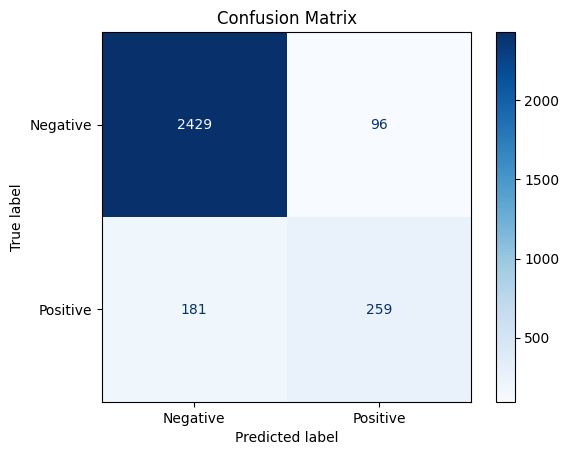

In [148]:
# Plot confusion matrix
labels = ['Negative', 'Positive']  # Assuming your classes are '0' and '1'
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## ROC

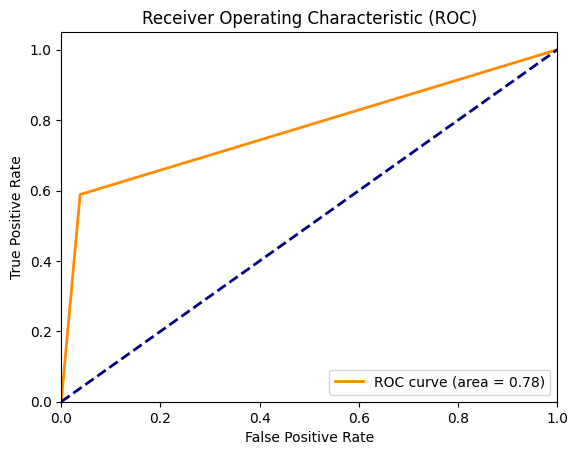

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [156]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9072512647554806
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2525
           1       0.82      0.48      0.60       440

    accuracy                           0.91      2965
   macro avg       0.87      0.73      0.78      2965
weighted avg       0.90      0.91      0.90      2965



In [158]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8988195615514334
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2525
           1       0.84      0.39      0.54       440

    accuracy                           0.90      2965
   macro avg       0.87      0.69      0.74      2965
weighted avg       0.89      0.90      0.88      2965



## VIF

In [109]:
feature_lists_dict.keys()

dict_keys(['DS_numerical', 'DS_cat_nominal', 'DS_cat_ordinal_lowest_num_is_highest_value', 'DS_cat_ordinal_highest_num_is_highest_value', 'DS_cat_nominal_binary_Y1_N2', 'DS_cat_nominal_binary_Y1_N0'])

In [110]:
numerical_features = feature_lists_dict['DS_numerical']

In [111]:
num_df = X[numerical_features]
num_df

,CM Age last birthday,Height in centimeters,Weight in kilos,Body fat percentage,Days last week spent doing moderate to vigorous physical activity,Hours per WEEKDAY spent watching TV or videos on computer,Hours per WEEKDAY spent playing electronic games,Hours per week spent on social networking sites,How likely is it CM will remain in education at the end of year 11?,How likely is it CM will go to university? (Scale 0-100%),How willing is CM to take risks,How patient is CM,How much does CM trust others
0,0.0,0.844650,0.440496,0.237772,0.25,0.571429,0.142857,0.285714,0.9,0.77,0.9,0.8,0.8
1,0.5,0.898148,0.480165,0.209239,0.25,0.714286,1.000000,0.857143,1.0,0.80,0.7,0.5,0.7
2,0.0,0.848251,0.472727,0.376359,0.25,0.142857,0.142857,0.142857,1.0,0.94,0.6,0.9,0.8
3,0.5,0.864198,0.433884,0.269022,0.00,0.571429,0.428571,0.142857,0.8,0.85,0.6,0.4,0.7
4,0.0,0.847737,0.478512,0.376359,0.75,0.714286,0.000000,0.428571,1.0,1.00,0.8,0.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,0.5,0.942901,0.597521,0.194293,0.25,1.000000,0.714286,1.000000,1.0,0.75,0.8,0.4,0.3
11855,0.5,0.815844,0.448760,0.380435,0.00,0.428571,0.285714,0.571429,0.9,0.61,0.5,0.5,0.8
11856,0.5,0.842078,0.409091,0.278533,0.50,0.428571,0.285714,0.428571,0.6,0.46,0.2,0.6,0.9
11857,0.5,0.881687,0.514050,0.422554,1.00,1.000000,0.857143,0.857143,1.0,0.50,0.4,0.6,0.2


In [114]:
# Convert the DataFrame to a format that statsmodels expects
num_df_with_const = add_constant(num_df)

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()

# Add the column names to the VIF DataFrame
vif_data["feature"] = num_df_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num_df_with_const.values, i) for i in range(num_df_with_const.shape[1])]

# Sort desc

sorted_vif_df = vif_data.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
sorted_vif_df

,feature,VIF
0,const,75.009654
3,Weight in kilos,3.633589
4,Body fat percentage,2.669361
2,Height in centimeters,1.834428
10,How likely is it CM will go to university? (Sc...,1.297836
9,How likely is it CM will remain in education a...,1.291919
7,Hours per WEEKDAY spent playing electronic games,1.245223
8,Hours per week spent on social networking sites,1.199606
6,Hours per WEEKDAY spent watching TV or videos ...,1.177343
12,How patient is CM,1.165265


In [115]:
# Convert the DataFrame to a format that statsmodels expects
X_with_const = add_constant(X)

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()

# Add the column names to the VIF DataFrame
vif_data["feature"] = X_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Sort desc

sorted_vif_df = vif_data.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
sorted_vif_df

,feature,VIF
0,const,570.427660
169,CM Sex_2,5.728750
3,Weight in kilos,5.398081
4,Body fat percentage,4.905039
93,How many of your close friends are girls?,3.794468
...,...,...
34,Where CM gets spending money from MC (A) [Othe...,1.025039
32,Where CM gets spending money from MC (A) [From...,1.023839
30,Where CM gets spending money from MC (A) [Rewa...,1.021853
174,Respondent s religion (A) [England]_5,1.019926
